In [1]:
import pymysql
import pandas as pd
import numpy as np

In [48]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [8]:
SBPSql1 = 'SELECT p1.ORDER_CODE,p1.RESULT,p1.UPPER_VALUE,p1.LOWER_VALUE,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER \
    FROM (SELECT * FROM t66_athena_basic_quantity_record WHERE SZ_STATUS = 1 AND SD_CODE = "S0000418N99") p1 \
    LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE LIMIT 0,500000' 
SBP_Recode1 = pd.read_sql(SBPSql1,con=conn)

SBPSql2 = 'SELECT p1.ORDER_CODE,p1.RESULT,p1.UPPER_VALUE,p1.LOWER_VALUE,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER \
    FROM (SELECT * FROM t66_athena_basic_quantity_record WHERE SZ_STATUS = 1 AND SD_CODE = "S0000418N99") p1 \
    LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE LIMIT 500000,500000' 
SBP_Recode2 = pd.read_sql(SBPSql2,con=conn)

SBPSql3 = 'SELECT p1.ORDER_CODE,p1.RESULT,p1.UPPER_VALUE,p1.LOWER_VALUE,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER \
    FROM (SELECT * FROM t66_athena_basic_quantity_record WHERE SZ_STATUS = 1 AND SD_CODE = "S0000418N99") p1 \
    LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE LIMIT 1000000,500000' 
SBP_Recode3 = pd.read_sql(SBPSql3,con=conn)

In [71]:
SBP = pd.DataFrame()
for i in [SBP_Recode1,SBP_Recode2,SBP_Recode3]:
    SBP.append(i)

In [76]:
SBP_Recode3['new_date'] = SBP_Recode3['EXAM_DATE'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [80]:
SBP_Recode3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448232 entries, 0 to 448231
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ORDER_CODE       448232 non-null  object 
 1   RESULT           448232 non-null  float64
 2   UPPER_VALUE      448232 non-null  float64
 3   LOWER_VALUE      448232 non-null  float64
 4   EXAM_DATE        448160 non-null  object 
 5   EXAMINEE_AGE     447036 non-null  float64
 6   EXAMINEE_GENDER  447036 non-null  object 
dtypes: float64(4), object(3)
memory usage: 23.9+ MB


In [9]:
SBP_Recode = pd.concat([SBP_Recode1,SBP_Recode2,SBP_Recode3],axis = 0)

In [10]:
SBP_Recode

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
0,606898462371,124.0,NaN,NaN,2020-02-29 00:00:00,73.0,M
1,485194753251,138.0,NaN,NaN,2020-01-12 00:00:00,60.0,MW
2,064707165127,154.0,NaN,NaN,2020-01-13 00:00:00,73.0,M
3,074452138242,136.0,NaN,NaN,2020-01-14 00:00:00,48.0,MW
4,016056732550,100.0,NaN,NaN,2020-01-11 00:00:00,51.0,MW
...,...,...,...,...,...,...,...
448227,5ki4jsegr15kqxk,146.0,139.0,90.0,2019-07-24 00:00:00,60.0,MW
448228,5ki4jsnl8m2po8d,138.0,140.0,90.0,2019-07-17 15:57:52,44.0,M
448229,5ki4jspd0scmyxu,127.0,139.0,90.0,2020-11-28 08:09:46,52.0,M
448230,5ki4jsxnazkvy3y,135.0,140.0,90.0,2019-07-24 15:05:14,31.0,M


In [52]:
SBP_Recode.to_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\SBP\20201130.SBP_Recode.pkl")

### 数据展现

In [53]:
SBP_Recode_C = SBP_Recode.copy()

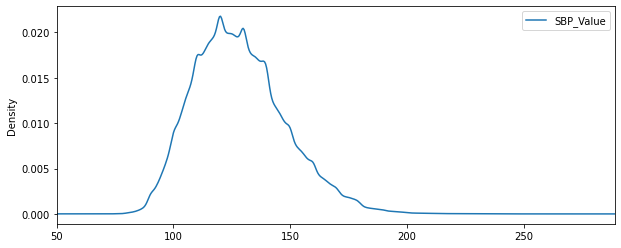

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
SBP_Recode_C.RESULT.dropna().plot(kind='kde', xlim=(min(SBP_Recode_C.RESULT)-10,max(SBP_Recode_C.RESULT)+10),label = "SBP_Value")
plt.legend()
plt.show()

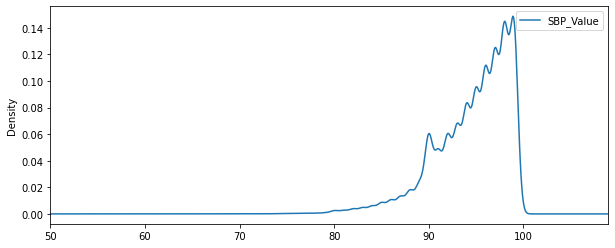

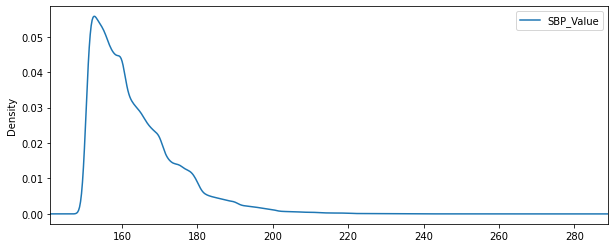

In [15]:
SBP_Recode_C1 = SBP_Recode_C.loc[SBP_Recode_C.RESULT <100 ,:]

plt.figure(figsize = (10,4))
SBP_Recode_C1.RESULT.dropna().plot(kind='kde', xlim=(min(SBP_Recode_C1.RESULT)-10,max(SBP_Recode_C1.RESULT)+10),label = "SBP_Value")
plt.legend()
plt.show()


SBP_Recode_C2 = SBP_Recode_C.loc[SBP_Recode_C.RESULT >150 ,:]

plt.figure(figsize = (10,4))
SBP_Recode_C2.RESULT.dropna().plot(kind='kde', xlim=(min(SBP_Recode_C2.RESULT)-10,max(SBP_Recode_C2.RESULT)+10),label = "SBP_Value")
plt.legend()
plt.show()

In [81]:
SBP_Recode1.index = pd.DatetimeIndex(SBP_Recode1.new_date)

In [86]:
SBP_Recode1.axes

[DatetimeIndex(['2020-02-29', '2020-01-12', '2020-01-13', '2020-01-14',
                '2020-01-11', '2020-01-09', '2020-01-04', '2020-01-09',
                '2020-01-08', '2020-01-11',
                ...
                '2019-09-26', '2019-11-24', '2019-11-02', '2019-12-20',
                '2019-10-13', '2019-12-29', '2019-10-13', '2019-07-17',
                '2019-11-27', '2019-11-09'],
               dtype='datetime64[ns]', name='new_date', length=500000, freq=None),
 Index(['ORDER_CODE', 'RESULT', 'UPPER_VALUE', 'LOWER_VALUE', 'EXAM_DATE',
        'EXAMINEE_AGE', 'EXAMINEE_GENDER', 'new_date'],
       dtype='object')]

In [83]:
SBP_Recode1 = SBP_Recode1.dropna(subset= ['EXAM_DATE','EXAMINEE_AGE','EXAMINEE_GENDER'])

In [92]:
SBP_W = pd.DataFrame(SBP_Recode1.RESULT.resample("W").agg([len,np.mean]))
SBP_D = pd.DataFrame(SBP_Recode1.RESULT.resample("D").agg([len,np.mean]))

In [93]:
SBP_W

,len,mean
new_date,,
2015-08-23,4.0,120.250000
2015-08-30,18.0,119.944444
2015-09-06,69.0,110.782609
2015-09-13,61.0,117.229508
2015-09-20,26.0,122.576923
...,...,...
2020-05-10,6121.0,131.554811
2020-05-17,16729.0,131.217287
2020-05-24,13263.0,130.225892


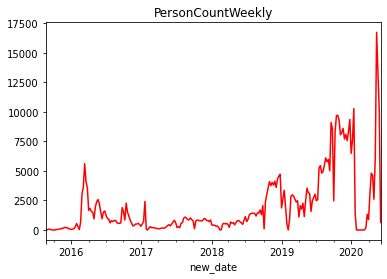

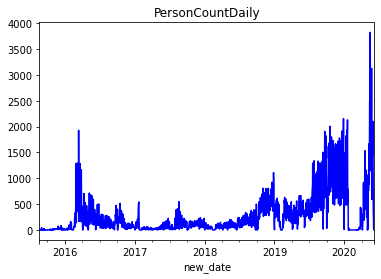

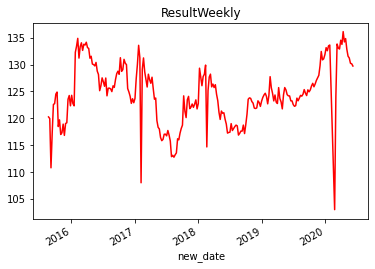

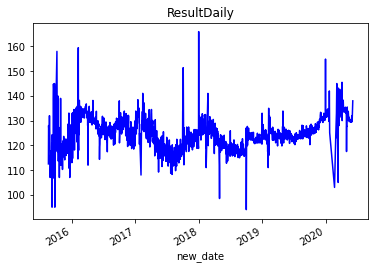

In [95]:
import matplotlib.pyplot as plt

data = [SBP_W["len"],SBP_D["len"],SBP_W["mean"],SBP_D["mean"]]
color = ["red","blue","red","blue"]
title = ["PersonCountWeekly","PersonCountDaily","ResultWeekly","ResultDaily"]

for i in range(0,4):
    data[i].dropna().plot(color = color[i])
    plt.title(title[i])
    plt.show()

In [98]:
SBP_Recode1.loc[~SBP_Recode1.index.year.isin([2015,2020]),:]

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date
new_date,,,,,,,,
2019-12-24,640979670195,163.0,NaN,NaN,2019-12-24 00:00:00,64,M,2019-12-24
2019-11-08,286417790901,117.0,140.0,90.0,2019-11-08 00:00:00,28,M,2019-11-08
2016-04-17,000002165753,118.0,139.0,90.0,2016-04-17 09:00:00,27,M,2016-04-17
2019-08-31,854553035388,127.0,139.0,90.0,2019-08-31 00:00:00,62,MW,2019-08-31
2016-03-13,000272873619,129.0,139.0,90.0,2016-03-13 09:00:00,60,MW,2016-03-13
...,...,...,...,...,...,...,...,...
2019-12-29,466856461550,121.0,139.0,90.0,2019-12-29 00:00:00,50,M,2019-12-29
2019-10-13,466851467610,119.0,139.0,90.0,2019-10-13 00:00:00,55,MW,2019-10-13
2019-07-17,466850590889,114.0,139.0,89.0,2019-07-17 00:00:00,54,MW,2019-07-17


In [102]:
SBP_D2015 = SBP_D.loc[SBP_D.index.year == 2015,:]
SBP_D2020 = SBP_D.loc[SBP_D.index.year == 2020,:]

<AxesSubplot:xlabel='new_date'>

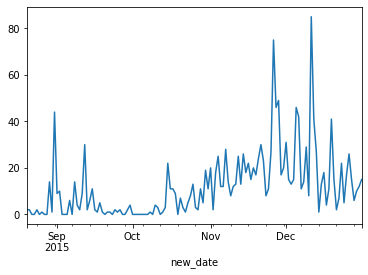

In [104]:
SBP_D2015["len"].plot()

<AxesSubplot:xlabel='new_date'>

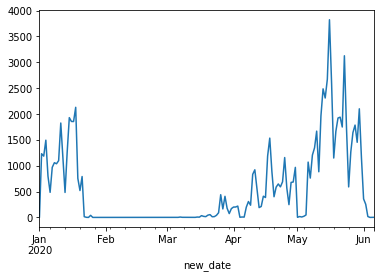

In [105]:
SBP_D2020["len"].plot()

### 血压随年龄的变化

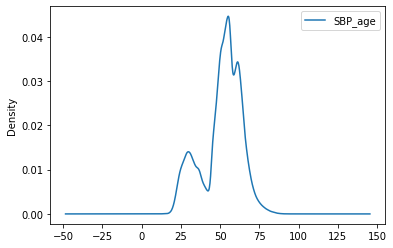

In [106]:
SBP_Recode.EXAMINEE_AGE.plot(kind = "kde",label = "SBP_age")
plt.legend()
plt.show()

In [110]:
SBP_Recode1_age = SBP_Recode1.groupby('EXAMINEE_AGE')['RESULT'].mean()

<AxesSubplot:xlabel='EXAMINEE_AGE'>

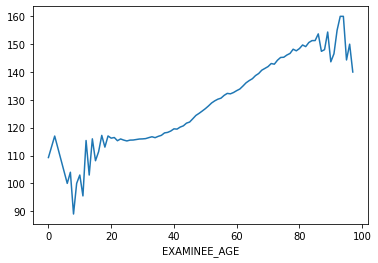

In [111]:
SBP_Recode1_age.plot()

In [113]:
SBP_Recode1

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date
new_date,,,,,,,,
2020-02-29,606898462371,124.0,NaN,NaN,2020-02-29,73,M,2020-02-29
2020-01-12,485194753251,138.0,NaN,NaN,2020-01-12,60,MW,2020-01-12
2020-01-13,064707165127,154.0,NaN,NaN,2020-01-13,73,M,2020-01-13
2020-01-14,074452138242,136.0,NaN,NaN,2020-01-14,48,MW,2020-01-14
2020-01-11,016056732550,100.0,NaN,NaN,2020-01-11,51,MW,2020-01-11
...,...,...,...,...,...,...,...,...
2019-12-29,466856461550,121.0,139.0,90.0,2019-12-29,50,M,2019-12-29
2019-10-13,466851467610,119.0,139.0,90.0,2019-10-13,55,MW,2019-10-13
2019-07-17,466850590889,114.0,139.0,89.0,2019-07-17,54,MW,2019-07-17


In [114]:
set(SBP_Recode1.EXAMINEE_GENDER)

{'M', 'MW', 'UW'}

In [123]:
SBP_gender_age = pd.DataFrame(SBP_Recode1.groupby(['EXAMINEE_GENDER','EXAMINEE_AGE'])['RESULT'].mean())

In [127]:
SBP_men = SBP_Recode1.loc[SBP_Recode1.EXAMINEE_GENDER == "M",:]
SBP_men_age = pd.DataFrame(SBP_men.groupby(['EXAMINEE_AGE'])['RESULT'].mean())

SBP_women = SBP_Recode1.loc[~SBP_Recode1.EXAMINEE_GENDER.isin(["M"]),:]
SBP_women_age = pd.DataFrame(SBP_women.groupby(['EXAMINEE_AGE'])['RESULT'].mean())

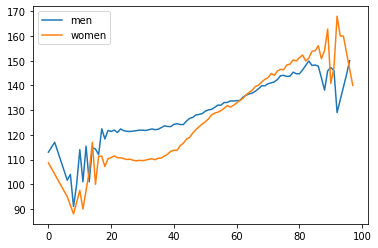

In [129]:
plt.plot(SBP_men_age,label = "men")
plt.plot(SBP_women_age,label = "women")
plt.legend()

In [144]:
from datetime import *

In [167]:
SBP = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\SBP\spfull.pkl")

In [169]:
SBP.sort_values(by='EXAM_DATE')

,ORDER_CODE,result,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
1436256,5ki3uy8ljbrzptq,119.0,0019-12-16 00:00:00,0.0,MW
70619,212315677299,104.0,2015-08-20 09:00:00,27.0,UW
43780,124661727877,121.0,2015-08-20 09:00:00,64.0,M
124068,395873622824,121.0,2015-08-21 09:00:00,29.0,M
298160,963095488334,135.0,2015-08-21 09:00:00,61.0,M
...,...,...,...,...,...
1362173,5khxbnxz6jdvl1q,94.0,NaT,NaN,None
1362182,5khxbon5tlutp3s,140.0,NaT,NaN,None
1362185,5khxbotgpxxd7v5,127.0,NaT,NaN,None
1362195,5khxbpcbzwr5dib,137.0,NaT,NaN,None


In [146]:
SBP = SBP.loc[(SBP['EXAM_DATE']>datetime(2016,1,2,23,59)) & (SBP['EXAM_DATE']<datetime(2020,1,1,0,0))]

In [151]:
SBP = SBP.set_index('EXAM_DATE')

In [162]:
datetime(2016,1,2,23,59)

datetime.datetime(2016, 1, 2, 23, 59)

In [154]:
SBP1 = pd.DataFrame(SBP.result.resample("W").mean())

In [155]:
SBP1

,result
EXAM_DATE,
2016-01-10,122.421687
2016-01-17,122.420168
2016-01-24,132.273381
2016-01-31,133.394545
2016-02-07,134.868056
...,...
2019-12-08,132.317693
2019-12-15,131.094002
2019-12-22,131.394964


In [160]:
SBP.index = pd.DatetimeIndex(SBP.index)

In [163]:
SBP.loc[SBP.index.year == 2019,:]

,ORDER_CODE,result,EXAMINEE_AGE,EXAMINEE_GENDER
EXAM_DATE,,,,
2019-12-24,640979670195,163.0,64.0,M
2019-11-08,286417790901,117.0,28.0,M
2019-08-31,854553035388,127.0,62.0,MW
2019-09-04,000581956538,105.0,56.0,M
2019-12-03,688647772845,138.0,63.0,M
...,...,...,...,...
2019-08-31,5ki4uw77gqonabb,200.0,NaN,NaN
2019-12-08,5ki4uw9py4utddz,127.0,NaN,NaN
2019-08-24,5ki4uwcwaa6l2bz,138.0,NaN,NaN


In [54]:
bins = [0,20,55,100]
bins_label = ["young(<20)","adult(20-55)","senior(>55)"]
SBP_Recode_C["Age_label"] = pd.cut(SBP_Recode_C['EXAMINEE_AGE'],bins = bins, labels = bins_label)

In [55]:
SBP_Recode_C = SBP_Recode_C.dropna(subset = ['RESULT','EXAM_DATE','EXAMINEE_AGE',"EXAMINEE_GENDER"],axis = 0)

In [165]:
SBP

,ORDER_CODE,result,EXAMINEE_AGE,EXAMINEE_GENDER
EXAM_DATE,,,,
2019-12-24 00:00:00,640979670195,163.0,64.0,M
2019-11-08 00:00:00,286417790901,117.0,28.0,M
2016-04-17 09:00:00,000002165753,118.0,27.0,M
2019-08-31 00:00:00,854553035388,127.0,62.0,MW
2016-03-13 09:00:00,000272873619,129.0,60.0,MW
...,...,...,...,...
2019-08-31 00:00:00,5ki4uw77gqonabb,200.0,NaN,NaN
2019-12-08 00:00:00,5ki4uw9py4utddz,127.0,NaN,NaN
2019-08-24 00:00:00,5ki4uwcwaa6l2bz,138.0,NaN,NaN


In [164]:
SBP_Recode_C["EXAM_DATE"] = pd.to_datetime(SBP_Recode_C["EXAM_DATE"]).dt.time
SBP_Recode_C.set_index("EXAM_DATE",inplace = True)

# SBP_Recode_C.set_index("EXAM_DATE",inplace = True)
# SBP_Recode_C.index = pd.DatetimeIndex(SBP_Recode_C.index)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 19-12-16 00:00:00

In [59]:
SBP_Recode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449594 entries, 0 to 1449752
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ORDER_CODE       1449594 non-null  object 
 1   RESULT           1449594 non-null  float64
 2   UPPER_VALUE      1270900 non-null  float64
 3   LOWER_VALUE      1270900 non-null  float64
 4   EXAM_DATE        1449522 non-null  object 
 5   EXAMINEE_AGE     1448331 non-null  float64
 6   EXAMINEE_GENDER  1448331 non-null  object 
dtypes: float64(4), object(3)
memory usage: 88.5+ MB


In [64]:
t1 = SBP_Recode1.set_index("EXAM_DATE")
t2 = SBP_Recode2.set_index("EXAM_DATE")
t3 = SBP_Recode3.set_index("EXAM_DATE")

In [65]:
t4 = pd.concat([t1,t2,t3],axis = 0)

In [69]:
t4

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date
EXAM_DATE,,,,,,,
2020-02-29 00:00:00,606898462371,124.0,NaN,NaN,73.0,M,2020-02-29
2020-01-12 00:00:00,485194753251,138.0,NaN,NaN,60.0,MW,2020-01-12
2020-01-13 00:00:00,064707165127,154.0,NaN,NaN,73.0,M,2020-01-13
2020-01-14 00:00:00,074452138242,136.0,NaN,NaN,48.0,MW,2020-01-14
2020-01-11 00:00:00,016056732550,100.0,NaN,NaN,51.0,MW,2020-01-11
...,...,...,...,...,...,...,...
2019-07-24 00:00:00,5ki4jsegr15kqxk,146.0,139.0,90.0,60.0,MW,NaN
2019-07-17 15:57:52,5ki4jsnl8m2po8d,138.0,140.0,90.0,44.0,M,NaN
2020-11-28 08:09:46,5ki4jspd0scmyxu,127.0,139.0,90.0,52.0,M,NaN


In [44]:
SBP_Recode_C

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER
EXAM_DATE,,,,,,
2020-02-29 00:00:00,606898462371,124.0,NaN,NaN,73.0,M
2020-01-12 00:00:00,485194753251,138.0,NaN,NaN,60.0,MW
2020-01-13 00:00:00,064707165127,154.0,NaN,NaN,73.0,M
2020-01-14 00:00:00,074452138242,136.0,NaN,NaN,48.0,MW
2020-01-11 00:00:00,016056732550,100.0,NaN,NaN,51.0,MW
...,...,...,...,...,...,...
2019-07-24 00:00:00,5ki4jsegr15kqxk,146.0,139.0,90.0,60.0,MW
2019-07-17 15:57:52,5ki4jsnl8m2po8d,138.0,140.0,90.0,44.0,M
2020-11-28 08:09:46,5ki4jspd0scmyxu,127.0,139.0,90.0,52.0,M


In [38]:
SBP_Recode_C.axes

[Index([2020-02-29 00:00:00, 2020-01-12 00:00:00, 2020-01-13 00:00:00,
        2020-01-14 00:00:00, 2020-01-11 00:00:00, 2020-01-09 00:00:00,
        2020-01-04 00:00:00, 2020-01-09 00:00:00, 2020-01-08 00:00:00,
        2020-01-11 00:00:00,
        ...
        2019-08-24 00:00:00, 2019-10-18 00:00:00, 2019-10-15 00:00:00,
        2019-11-29 00:00:00, 2019-08-22 00:00:00, 2019-07-24 00:00:00,
        2019-07-17 15:57:52, 2020-11-28 08:09:46, 2019-07-24 15:05:14,
        2019-07-25 00:00:00],
       dtype='object', name='EXAM_DATE', length=1446966),
 Index(['ORDER_CODE', 'RESULT', 'UPPER_VALUE', 'LOWER_VALUE', 'EXAMINEE_AGE',
        'EXAMINEE_GENDER', 'Age_label'],
       dtype='object')]

In [22]:
SBP_Y= pd.DataFrame(SBP_Recode_C.loc[SBP_Recode_C.Age_label == "young(<20)","RESULT"])
SBP_Y = pd.DataFrame(SBP_Y.RESULT.resample('D').agg([len,sum,np.mean]))

SBP_A= pd.DataFrame(SBP_Recode_C.loc[SBP_Recode_C.Age_label == "adult(20-55)","RESULT"])
SBP_A = pd.DataFrame(SBP_A.RESULT.resample('D').agg([len,sum,np.mean]))

SBP_S = pd.DataFrame(SBP_Recode_C.loc[SBP_Recode_C.Age_label == "senior(>55)","RESULT"])
SBP_S = pd.DataFrame(SBP_S.RESULT.resample('D').agg([len,sum,np.mean]))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
import matplotlib.pyplot as plt

data = [SBP_Y,SBP_Y,SBP_S]
colors = ["orange","blue","purple"]
title= ["young(<20)","adult(20-55)","senior(>55)"]



for i in range(0,3):
    plt.figure(figsize = (12,9))
    ax = plt.subplot(3,1,i+1)
    data[i]["mean"].dropna().plot(ax = ax, color = colors[i])
    plt.title(title[i])
    plt.legend()
    plt.show()